# Вопросы к assignment 1
Для работы вам предоставлен датасет, содержащий характеристики авто (19 признаков) и таргет для предсказания - его цену. Цена по своей сути - это непрерывная величина (не категориальная), поэтому перед вами задача регрессии.

Вы можете создавать более одной ячейком под соответствующими вопросами. Вопросы повышенной сложности отмечены *

Признаки:
- Make - приозводитель
- Model - модель авто
- Price - цена авто, таргет для моделей
- Year - год выпуска авто
- Kilometer - пробег авто в километрах
- Fuel Type - тип топлива для авто
- Transmission - тип коробка передач
- Location - место продажи
- Color - цвет авто
- Owner - количество предыдущих владельцев
- Seller Type - кто выступает продавцом
- Engine - тип двигателя
- Max Power - максимальная мощность авто
- Max Torque - максимальный крутящий момент авто
- Drivetrain - тип трансмиссии авто
- Length - длина авто
- Width - ширина авто
- Height - высота авто
- Seating Capacity - количество сидячих мест
- Fuel Tank Capacity - объем топливного бака

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('car details v4.csv')

In [3]:
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


1. Вывести общую информацию по данным, сколько числовых и сколько сктроковых типов признаков? Перечислить признаки, имеющие пропуски в данных. Какие методы работы с пропущенными значениями вы знаете? Обработайте эти пропуски. Важно, линейная регрессия не умеет работать с пропусками в данных.

In [4]:
# your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
data.describe()


,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [6]:
data.shape

(2059, 20)

In [7]:
def fill_missing_data(column):
    if column.dtype=='O':
        return column.fillna(column.mode()[0])
    else:
        return column.fillna(column.median())
        

In [8]:
data[data.isnull()]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_filled=data.apply(fill_missing_data)

In [10]:
data_filled[data_filled.isnull()].count()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

2. Вывести описательные статистики по численным признакам. Какая медиана у признака "Kilometer"? Какая медиана у признака "Fuel Tank Capacity"? Какой год выпуска является самым минимальным/максимальным? Выведите строку(-и) в данных, имеющую(-щих) эти года выпуска.

In [11]:
# your code here
data_filled.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4283.631374,1768.054395,1590.282661,5.296746,51.892326
std,2.419881e+06,3.363564,5.736172e+04,435.799127,133.146412,134.186875,0.811029,14.696588
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3986.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4620.000000,1831.000000,1672.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


3. Какой производитель ("Make") встречается наиболее часто в датасете? Выведите количество и долю в процентах.

In [12]:
# your code here
data['Make'].value_counts()

Make
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
MG                17
Jaguar            17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Lamborghini        1
Ferrari            1
Name: count, dtype: int64

4. Какой город наиболее часто встречается в датасете?

In [13]:
# your code here
data.Location.describe()

count       2059
unique        77
top       Mumbai
freq         342
Name: Location, dtype: object

5. Постройте гистограмму для признака "Fuel Tank Capacity". Какими бы вы выбрали границы категорий для разбиения этого признака и что может помочь вам в этом? В каких целях можно использовать эти категории в дальнейшем? Повторите описанные действия для признака "Seating Capacity".

<Axes: >

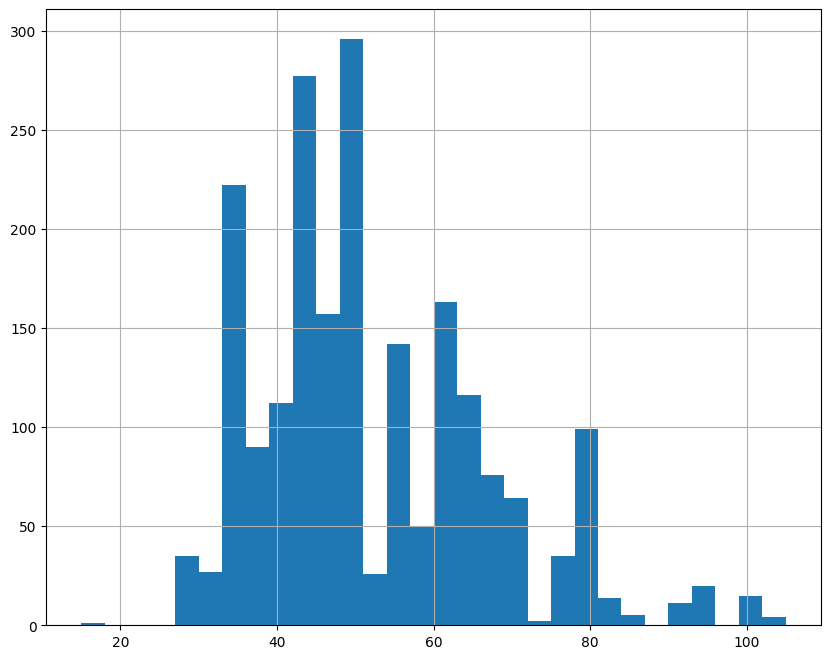

In [14]:
data_filled['Fuel Tank Capacity'].hist(figsize=(10,8),bins=30)

In [15]:
data_filled['Fuel Tank Capacity'].describe()

count    2059.000000
mean       51.892326
std        14.696588
min        15.000000
25%        42.000000
50%        50.000000
75%        60.000000
max       105.000000
Name: Fuel Tank Capacity, dtype: float64

In [16]:
bins=[0,40,70,110]
labels=[1,2,3]
data_filled['Fuel Tank Category']=pd.cut(data_filled['Fuel Tank Capacity'],bins=bins,labels=labels,right=True)

<Axes: >

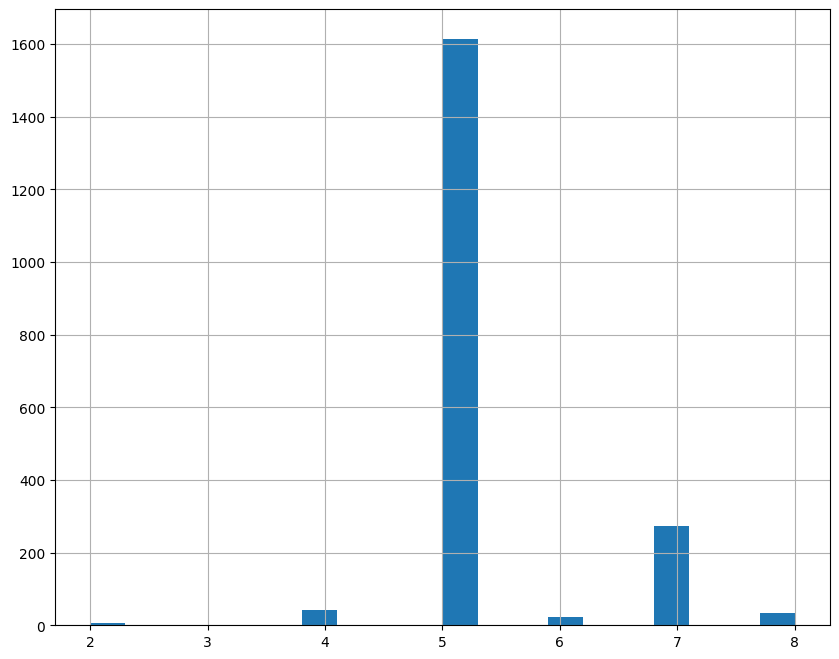

In [17]:
data['Seating Capacity'].hist(figsize=(10,8),bins=20)

In [18]:
data['Seating Capacity'].describe()

count    1995.000000
mean        5.306266
std         0.822170
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         8.000000
Name: Seating Capacity, dtype: float64

In [19]:
bins=[0,5,10]
labels=[1,2]
data_filled['Seating Category']=pd.cut(data_filled['Seating Capacity'],bins=bins,labels=labels,right=True)

In [20]:
data_filled

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Fuel Tank Category,Seating Category
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,1,1
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,2,1
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,1,1
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,1,1
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,2,2
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,1,1
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,2,1
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,...,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,2,1


In [21]:
pd.__version__

'2.2.2'

*6. Постройте pie chart для признаков "Color"/"Owner"/"Seller Type". Укажите данные как в числах, так и в процентах. 
Добавьте легенду на графики (подписи осей, категорий данных, поиграйтесь с цветом и другим функционалом seaborn).

In [22]:
# your code here
def plot_pie_chart(data,title):
    count=data.value_counts()
    labels=count.index
    sizes=count.values
    percentages=100. * sizes/sizes.sum()
    plt.figure(figsize=(10,8))
    colors=sns.color_palette()[0:len(labels)]
    patches, texts, autotexts= plt.pie(sizes, labels=labels,colors=colors,autopct='%1.1f%%', startangle=140)
    plt.title(title, fontsize=14)
    plt.legend(patches, [f"{label}: {size} ({percentage:.1f}%)" for label, size, percentage in zip(labels, sizes, percentages)], loc="right")
    plt.axis('equal')
    plt.show()

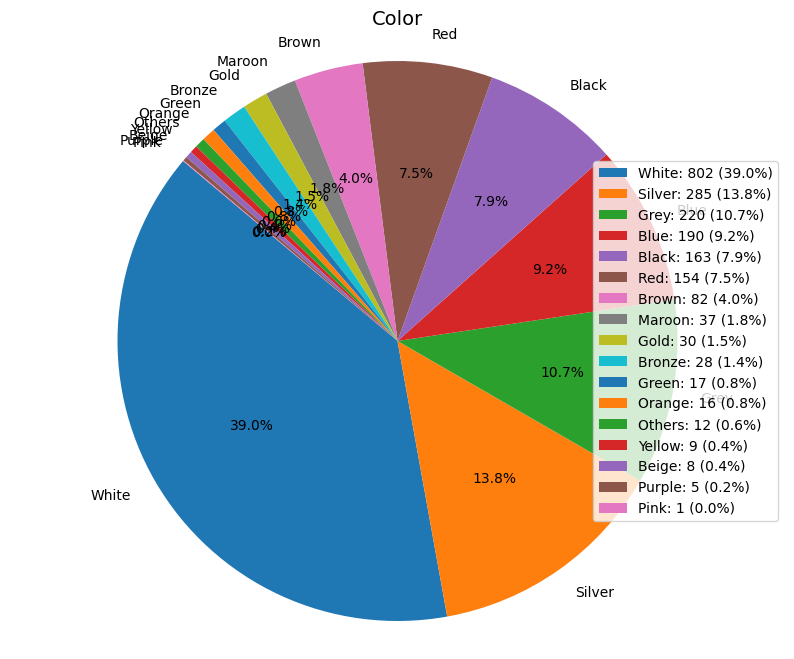

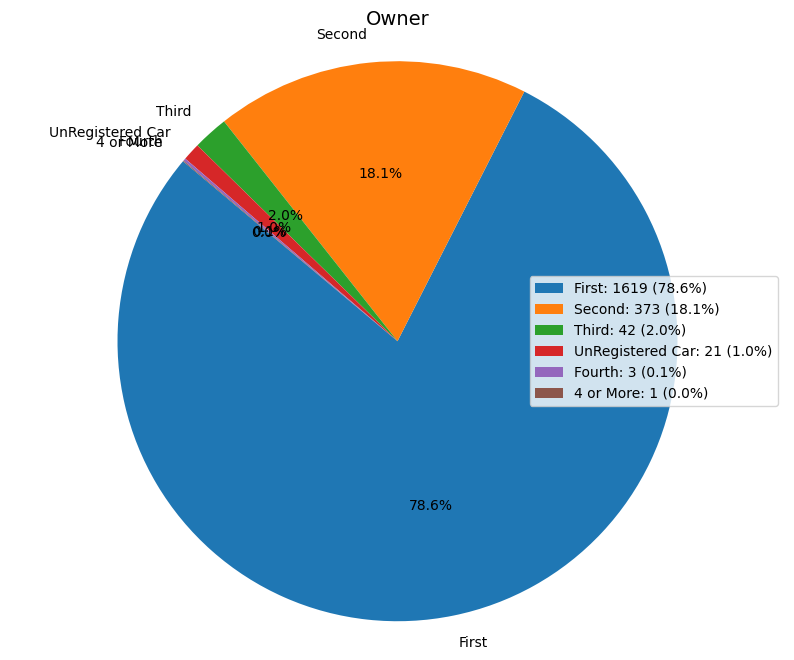

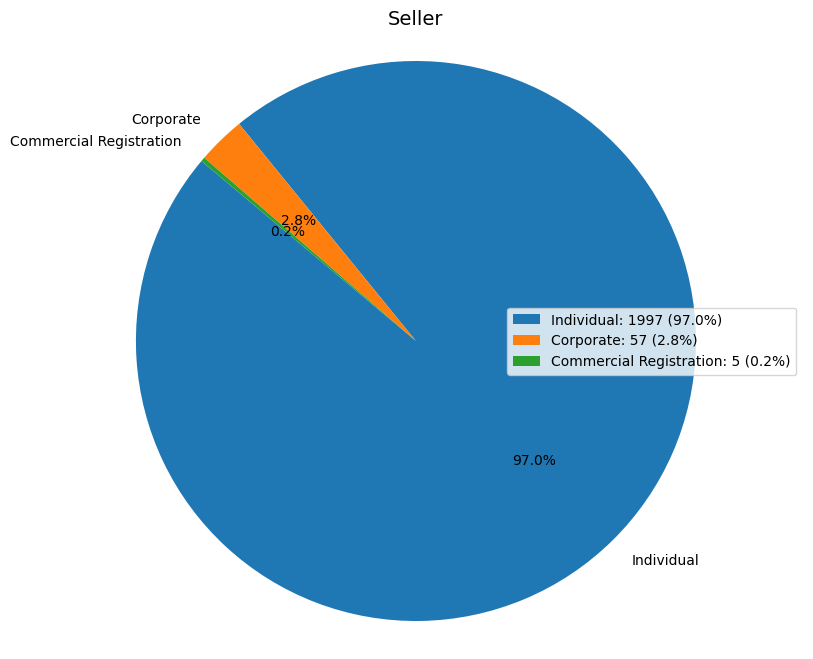

In [23]:
plot_pie_chart(data_filled['Color'], 'Color')
plot_pie_chart(data_filled['Owner'], 'Owner')
plot_pie_chart(data_filled['Seller Type'], 'Seller')

7. Добавьте к данным новые признаки (новые колонки) в группировке по прозводителю ("Make"): медиана "Kilometer"/"Length"/"Fuel tank Capacity". Т.е. для каждой записи в новой колонке должны содержаться соответствующие данной модели признаки, которые показывают "медиану пробега авто марки Toyota" и т.д. Подсказка: необходимо воспользоваться методом groupby().

In [24]:
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Make                2059 non-null   object  
 1   Model               2059 non-null   object  
 2   Price               2059 non-null   int64   
 3   Year                2059 non-null   int64   
 4   Kilometer           2059 non-null   int64   
 5   Fuel Type           2059 non-null   object  
 6   Transmission        2059 non-null   object  
 7   Location            2059 non-null   object  
 8   Color               2059 non-null   object  
 9   Owner               2059 non-null   object  
 10  Seller Type         2059 non-null   object  
 11  Engine              2059 non-null   object  
 12  Max Power           2059 non-null   object  
 13  Max Torque          2059 non-null   object  
 14  Drivetrain          2059 non-null   object  
 15  Length              2059 non-null   fl

In [25]:
# your code here
numeric_cols = data_filled.select_dtypes(include='number').columns
grouped = data_filled.groupby('Make')[numeric_cols].median()
data_filled['Median Kilometer'] = data_filled['Make'].map(grouped['Kilometer'])
data_filled['Median Length'] = data_filled['Make'].map(grouped['Length'])
data_filled['Median Fuel tank'] = data_filled['Make'].map(grouped['Fuel Tank Capacity'])
data_filled

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Fuel Tank Category,Seating Category,Median Kilometer,Median Length,Median Fuel tank
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,3990.0,1680.0,1505.0,5.0,35.0,1,1,53729.0,4420.0,40.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,3995.0,1695.0,1555.0,5.0,42.0,2,1,50549.5,3850.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,3585.0,1595.0,1550.0,5.0,35.0,1,1,48500.0,3995.0,45.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,3995.0,1745.0,1510.0,5.0,37.0,1,1,69250.0,4705.0,55.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,4735.0,1830.0,1795.0,7.0,55.0,2,2,69250.0,4705.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,4585.0,1890.0,1785.0,7.0,70.0,2,2,60000.0,4456.0,60.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,3495.0,1550.0,1500.0,5.0,32.0,1,1,48500.0,3995.0,45.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,3795.0,1680.0,1427.0,5.0,45.0,2,1,63295.5,3999.0,52.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,...,4936.0,1868.0,1479.0,5.0,65.0,2,1,41296.0,4752.0,60.0


8. Для всех полученных на данный момент числовых признаков постройте график матрицы корреляций, на нем выведите значение корреляций в виде тепловой карты. Также постройте ещё одну матрицу корреляций, в которую пойдут топ 5 признаков по значению корреляции.

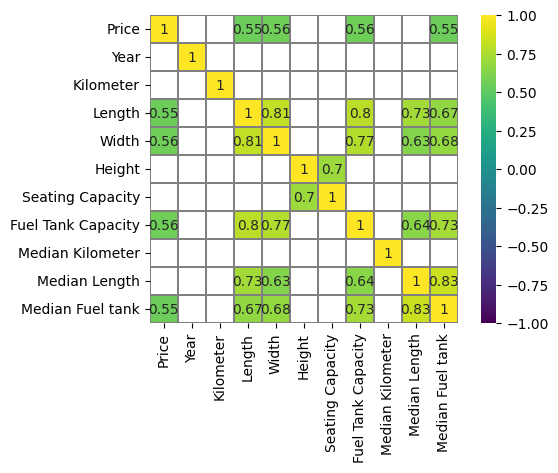

In [26]:
# your code here
data_numeric = data_filled.select_dtypes(include='number')
data_cor=data_numeric.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(
    data_cor[(data_cor >= 0.5) | (data_cor <= -0.4)], 
    cmap='viridis', 
    vmax=1.0, 
    vmin=-1.0, 
    linewidths=0.005,
    linecolor='gray',
    annot=True, 
    annot_kws={"size": 10}, square=True
);

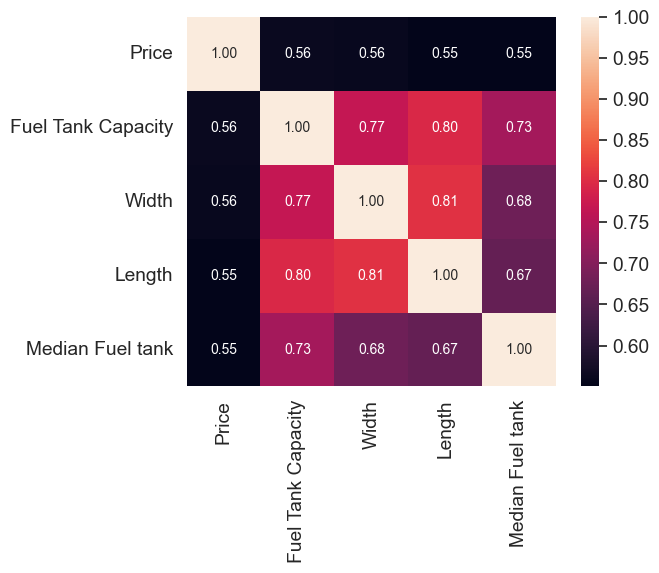

In [27]:
k = 5
cols = data_cor.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(data_filled[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

9. Обработайте категориальные признаки, содержащие менее 5 уникальных значений. Воспользуйтесь OrdinalEncoding, OneHotEncoding или простым mapping чисел для этих признаков. Для дальнейших заданий удалите все остальные категориальные признаки (все, которые содержат больше 5 уникальных значений). Важно, вы не сможете построить линейную регрессию на текстовых признаках, поэтому все текстовые признаки необходимо удалить или транфсормировать в числовые.

In [28]:
# your code here
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
categorical_cols = data_filled.select_dtypes(include='object').columns
cols_to_encode = [col for col in categorical_cols if data_filled[col].nunique() <= 5]

ordinal_encoder = OrdinalEncoder()
data_filled[cols_to_encode] = ordinal_encoder.fit_transform(data_filled[cols_to_encode])

cols_to_drop = [col for col in categorical_cols if data_filled[col].nunique() > 5]
data_filled = data_filled.drop(columns=cols_to_drop)

data_filled

,Price,Year,Kilometer,Transmission,Seller Type,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Fuel Tank Category,Seating Category,Median Kilometer,Median Length,Median Fuel tank
0,505000,2017,87150,1.0,1.0,1.0,3990.0,1680.0,1505.0,5.0,35.0,1,1,53729.0,4420.0,40.0
1,450000,2014,75000,1.0,2.0,1.0,3995.0,1695.0,1555.0,5.0,42.0,2,1,50549.5,3850.0,42.0
2,220000,2011,67000,1.0,2.0,1.0,3585.0,1595.0,1550.0,5.0,35.0,1,1,48500.0,3995.0,45.0
3,799000,2019,37500,1.0,2.0,1.0,3995.0,1745.0,1510.0,5.0,37.0,1,1,69250.0,4705.0,55.0
4,1950000,2018,69000,1.0,2.0,2.0,4735.0,1830.0,1795.0,7.0,55.0,2,2,69250.0,4705.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,1.0,2.0,1.0,4585.0,1890.0,1785.0,7.0,70.0,2,2,60000.0,4456.0,60.0
2055,275000,2014,83000,1.0,2.0,1.0,3495.0,1550.0,1500.0,5.0,32.0,1,1,48500.0,3995.0,45.0
2056,240000,2013,73000,1.0,2.0,1.0,3795.0,1680.0,1427.0,5.0,45.0,2,1,63295.5,3999.0,52.0
2057,4290000,2018,60474,0.0,2.0,2.0,4936.0,1868.0,1479.0,5.0,65.0,2,1,41296.0,4752.0,60.0


<Axes: xlabel='Price'>

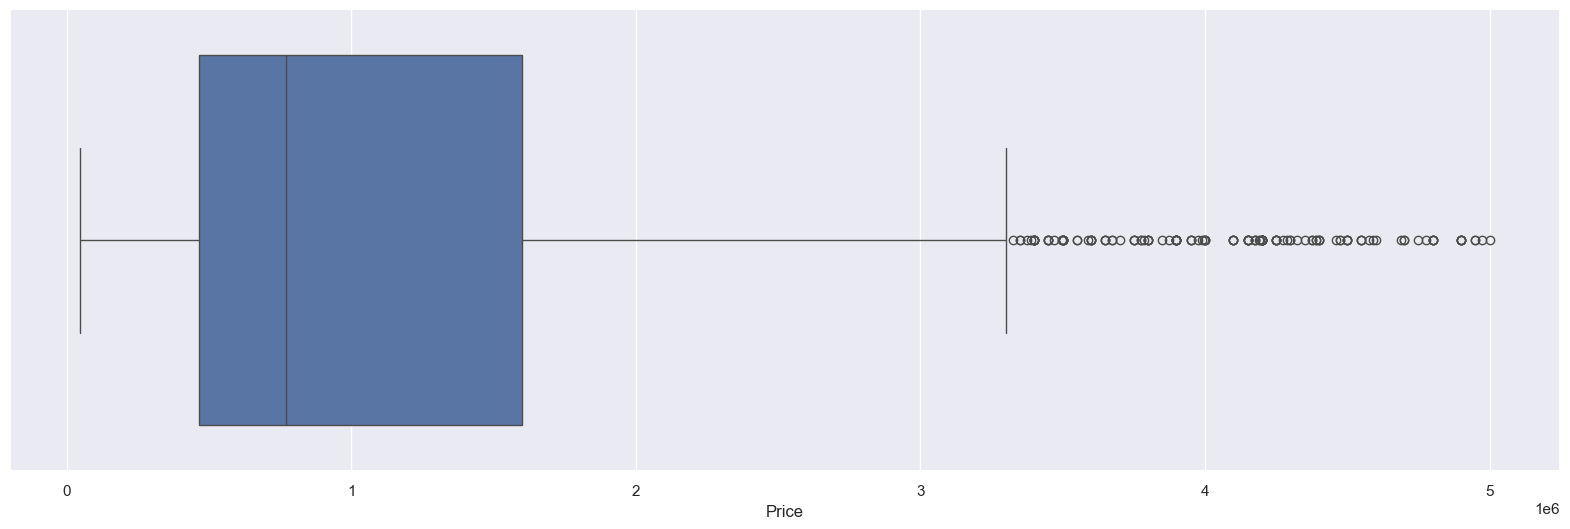

In [47]:
sns.set_theme(rc={'figure.figsize': (20, 6)})
sns.boxplot(ready_data['Price'],orient="y")

In [30]:
data_filled['Price'].value_counts()

Price
425000     26
625000     24
650000     22
375000     20
450000     20
           ..
169000      1
589000      1
999000      1
1270000     1
871000      1
Name: count, Length: 619, dtype: int64

In [31]:
data_filled['Price'].describe()

count    2.059000e+03
mean     1.702992e+06
std      2.419881e+06
min      4.900000e+04
25%      4.849990e+05
50%      8.250000e+05
75%      1.925000e+06
max      3.500000e+07
Name: Price, dtype: float64

In [52]:
ready_data=data_filled[data_filled['Price']<=0.33e7]

10. Воспользовавшись train test split разделите полученные данные на тестовую и трейн выборки в пропорции 80% train/20% test. Можем ли мы воспользоваться stratifed split? Вы можете использовать готовые реализации из sklearn, либо написать свои функции. Помните, что перед сплитом мы разделяем данные на признаки и таргет ("Price").

In [53]:
# your code here
from sklearn.model_selection import train_test_split
x=ready_data.drop(columns=['Price'])
y=ready_data['Price']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
train_set, test_set = train_test_split(ready_data, test_size=0.2, random_state=10)

11. Примените алгоритм линейной регрессии для обучения и дальнейшего прогнозирования цены автомобиля. Отобразите ошибку прогноза модели на тестовой выборке с помощью RMSE.

In [54]:
# your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

y_pred=lin_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))


rmse

np.float64(401776.5059296912)

In [57]:
data_num=data.select_dtypes(include='number')

*12. Постройте полный пайплайн по подготовке данных обучения через sklearn.pipeline.Pipeline. Для этого воспользуйтесь предыдущими вопросами, соберите все трансформации из предыдущих вопросов и реализуйте их в данном пайплайне. Помните, что некоторый функционал идёт из коробки (import из sklearn) , а некоторый (добавление новых признаков), можно реализовать через классы с методами fit/transform/fit_transform.

In [65]:
# your code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    
    ('std_scaler', StandardScaler()),
])

data_filled_num_tr = num_pipeline.fit_transform(data_num)

In [66]:
data_filled_num_tr.shape

(2059, 8)

In [56]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_filled)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs)
])

data_prepared = full_pipeline.fit_transform(data_filled)
data_test=

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared,data_test)

ValueError: Input y contains NaN.

*13. Подберите необходимые параметры модели Random Forest (n_estimators, max_features) используя стратегию кросс-валидации (с bootstrap=False и bootstrap=True). Удастся ли вам получить лучшую метрику на тестовых данных, чем если вы будете в качестве прогноза на тестовой выборке просто отдавать среднюю цену всех авто из обучающей выборки?

In [ ]:
# your code here